# Task 6. Algorithms on graphs. Path search algorithms on weighted graphs

### Goal
The use of path search algorithms on weighted graphs (Dijkstra's, A* and Bellman-Ford algorithms)

In [206]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import networkx as nx
import collections

Task I

In [207]:
# Generate a random adjacency matrix
n_V = 100
n_E = 500
n = n_E
adj_mtrx = np.zeros((n_V, n_V))

# with assigned random positive integer weights
while n != 0:
    i, j = np.random.randint(0, 99), np.random.randint(0, 99)
    if i != j and adj_mtrx[i, j] == 0:
        weight = np.random.randint(0, 99)
        adj_mtrx[i, j], adj_mtrx[j, i] = weight, weight
        n -= 1

print(f'Shape: {adj_mtrx.shape}, weight sum: {np.sum(adj_mtrx)}')

Shape: (100, 100), weight sum: 48354.0


In [208]:
# Transfer the matrix into an adjacency list
adj_lst = {i: [] for i in range(n_V)}
for k, v in adj_lst.items():
    for i in range(n_V):
        adj_lst[k].append([i, adj_mtrx[k, i]]) if adj_mtrx[k, i] != 0 else next

Use Dijkstra's and Bellman-Ford algorithms to find shortest paths between a random starting vertex and other vertices

In [209]:
# Graph class
class My_Graph:
    def __init__(self, temp, vertices):
        self.V = vertices
        self.graph = temp
    
    # decorator for time measure
    def timer(func):
        def wrapper(*args, **kwargs):
            before = time.time()
            func(*args, **kwargs)
            time_check = time.time() - before
            print(f'\nThe algorithm took: {time_check} seconds')
            return time_check
        return wrapper
    
    # print founded distance
    def dist_print(self, dist, src):
        print(f'Vertex Distance from starting node {src}')
        for i in range(len(dist)):
            print(f'{i}\t\t{dist[i]}')
    
    # graph visualisation
    def visualize(self):
        G = nx.Graph()
        plt.figure(figsize=(20,15))
        plt.title(f'My random graph with {n_V} vertices and {n_E} edges',
                  fontsize=25)
        visualize = [i[0:2] for i in self.graph]
        G.add_edges_from(visualize)
        nx.draw_networkx(G)
        plt.show()
    
    # Bellman-Ford algorithm
    @ timer
    def BF(self, src, show=True):
        # Initialize distances from src to all other vertices as INF
        dist = np.array([math.inf for i in range(self.V)])
        dist[src] = 0

        # Relax all edges |V| - 1 times
        for _ in range(self.V - 1):
            for u, v, w in self.graph:
                if dist[u] != math.inf and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w
        
        # Check for negative-weight cycles
        for u, v, w in self.graph:
            if dist[u] != math.inf and dist[u] + w < dist[v]:
                print('There is a negative weight cycle in current graph')
                return
        
        # print all distances
        if show == True:
            self.dist_print(dist, src)
    
    @ timer
    # Dijkstra's algorithm
    def Dijkstra(self, src, show=True):
        G = nx.Graph()
        G.add_nodes_from(list(set([i[0] for i in self.graph])))
        G.add_weighted_edges_from([i for i in self.graph])
        
        distances = nx.single_source_dijkstra(G, src)[0]
        
        sorted_distances = collections.OrderedDict(sorted(distances.items()))
        dist_list = [sorted_distances[i] for i in range(len(sorted_distances)) ]
        
        # print all distances
        if show == True:
            self.dist_print(dist_list, src)

In [210]:
# Run the weighted graph drawing
lst = []
for k, v in adj_lst.items():
    lst.extend([[k, i[0], i[1]] for i in v])
G = My_Graph(lst, n_V)  # graph init

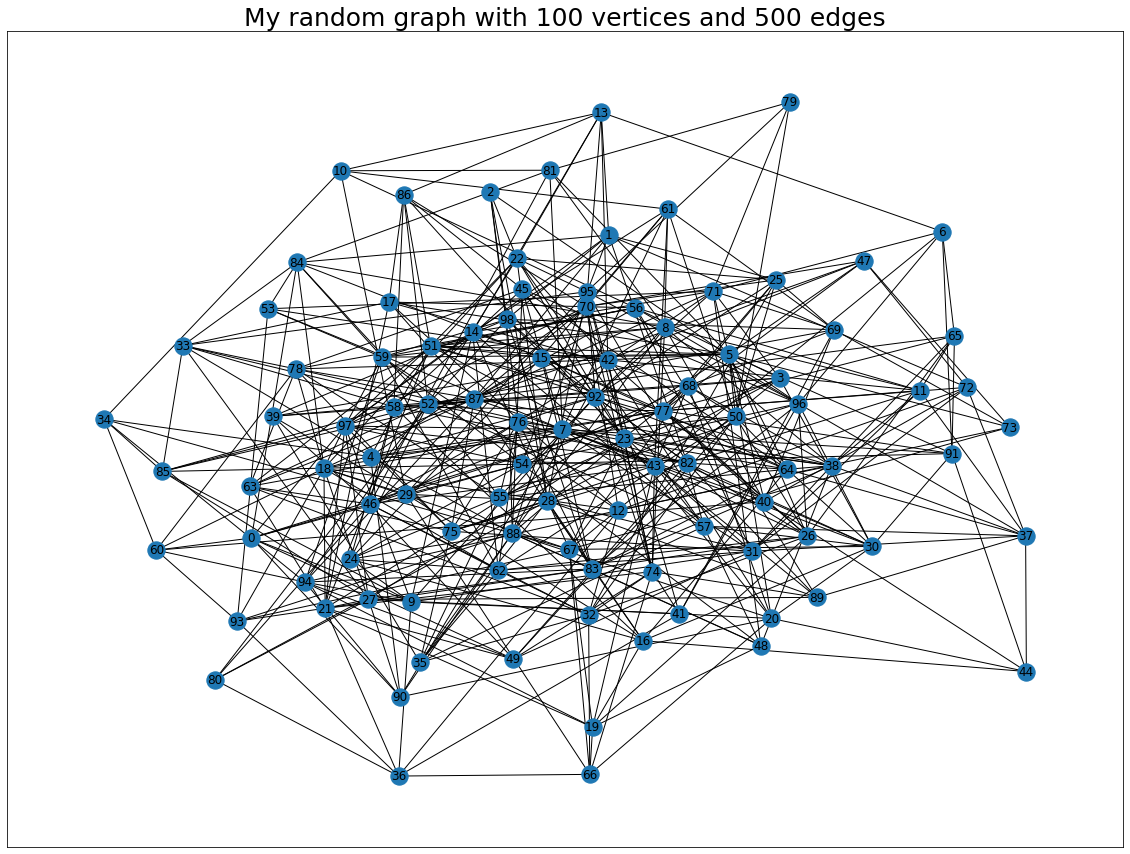

In [211]:
G.visualize()  # graph visualisation

In [212]:
# time calculation for 10 runs for each algorithm
time_lst_BF = []
time_lst_DJ = []
print('Start...')

for i in range(10):
    np.random.seed(1)
    src = np.random.randint(0, 99)
    time_lst_BF.append(G.BF(src, show=False))  # Run BF algorithm
    time_lst_DJ.append(G.Dijkstra(src, show=False))  # Run Dijkstra's algorithm

print('\nFinished!')
print(f'\nThe average time required \
for the paths search for BF algorithm is \n\
{sum(time_lst_BF)/len(time_lst_BF)} seconds!')
print(f'\nThe average time required \
for the paths search for Dijkstra algorithm is \n\
{sum(time_lst_DJ)/len(time_lst_DJ)} seconds!')

Start...

The algorithm took: 0.05006217956542969 seconds

The algorithm took: 0.0016181468963623047 seconds

The algorithm took: 0.04032611846923828 seconds

The algorithm took: 0.0015673637390136719 seconds

The algorithm took: 0.04149580001831055 seconds

The algorithm took: 0.0015239715576171875 seconds

The algorithm took: 0.039504289627075195 seconds

The algorithm took: 0.0015211105346679688 seconds

The algorithm took: 0.04387164115905762 seconds

The algorithm took: 0.0015058517456054688 seconds

The algorithm took: 0.03979086875915527 seconds

The algorithm took: 0.0015079975128173828 seconds

The algorithm took: 0.04166698455810547 seconds

The algorithm took: 0.001573801040649414 seconds

The algorithm took: 0.039553165435791016 seconds

The algorithm took: 0.0015311241149902344 seconds

The algorithm took: 0.0391535758972168 seconds

The algorithm took: 0.0015492439270019531 seconds

The algorithm took: 0.04179024696350098 seconds

The algorithm took: 0.001508474349975586 

Task II

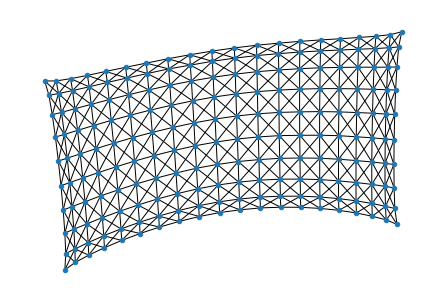

Obstacle cells [(8, 9), (5, 15), (0, 16), (1, 12), (7, 13), (6, 18), (4, 5), (2, 11), (2, 4), (7, 9), (1, 0), (6, 13), (7, 1), (0, 17), (8, 13), (3, 15), (8, 7), (3, 6), (5, 17), (3, 4), (8, 17), (4, 16), (3, 9), (2, 15), (0, 4), (2, 7), (3, 7), (7, 4), (5, 6), (8, 0), (2, 10), (7, 15), (7, 7), (3, 10), (0, 1), (1, 13), (3, 0), (6, 6), (2, 12), (5, 11)]


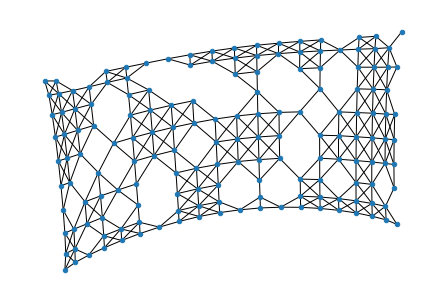

In [213]:
# Generate a 10x20 cell grid with 40 obstacle cells
G = nx.grid_2d_graph(10, 20)

for edge in G.edges:
    G.edges[edge]['weight'] = 1

G.add_edges_from([((x, y), (x+1, y+1)) 
                  for x in range(9) 
                  for y in range(19)] + 
                 [((x+1, y), (x, y+1))
                  for x in range(9)
                  for y in range(19)], weight=1.4)

pos = nx.spring_layout(G, iterations=1000, seed=41)
nx.draw(G, pos, node_size=20)
plt.show()

# Obstacle cells
removed = []
while (len(removed) != 40):
    point = (np.random.randint(0,9), np.random.randint(0,19))
    if point not in removed:
        removed.append(point)

G.remove_nodes_from(removed)
print("Obstacle cells", removed)

nx.draw(G, pos, node_size=20)
plt.show()

In [214]:
# euclidean distance
def euclidean(start, target):
    h = math.sqrt((target[0] - start[0]) ** 2 + (target[1] - start[1]) ** 2)
    return h

In [215]:
# A* algorithm
def find_path(start, target):
    print(f'Find path from {start} to {target}')
    path = nx.astar_path(G, start, target, euclidean)
    print(f'Founded path: {path}\n')
    return path

In [216]:
# loop for finding 5 random paths 
all_paths = []
for i in range(5):
    while True:
        start = (np.random.randint(0, 9), np.random.randint(0, 19))
        target = (np.random.randint(0, 9), np.random.randint(0, 19))
        if (start not in removed) and (target not in removed):
            break
    all_paths.append(find_path(start, target))

Find path from (7, 17) to (7, 10)
Founded path: [(7, 17), (7, 16), (6, 15), (6, 14), (5, 13), (6, 12), (7, 11), (7, 10)]

Find path from (4, 0) to (1, 9)
Founded path: [(4, 0), (4, 1), (3, 2), (2, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9)]

Find path from (8, 18) to (3, 1)
Founded path: [(8, 18), (7, 17), (7, 16), (6, 15), (6, 14), (5, 13), (5, 12), (4, 11), (4, 10), (4, 9), (4, 8), (4, 7), (4, 6), (3, 5), (4, 4), (4, 3), (3, 2), (3, 1)]

Find path from (6, 0) to (2, 6)
Founded path: [(6, 0), (5, 1), (4, 2), (4, 3), (4, 4), (3, 5), (2, 6)]

Find path from (1, 18) to (1, 10)
Founded path: [(1, 18), (1, 17), (1, 16), (1, 15), (1, 14), (0, 13), (0, 12), (1, 11), (1, 10)]



In [217]:
# plot all founded paths
def plot_paths(G, pos, all_paths):
    color_list = ['b', 'r', 'g', 'c', 'y']
    for path, color in zip(all_paths, color_list):
        nx.draw(G, pos, node_size=10, node_color='k')
        nx.draw_networkx_nodes(G, 
                               pos, 
                               nodelist=path, 
                               node_color=color, 
                               node_size=30)
        plt.show()

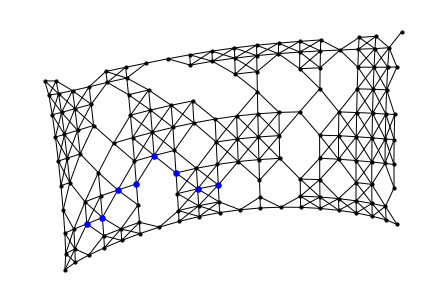

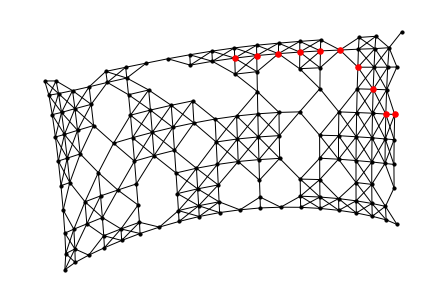

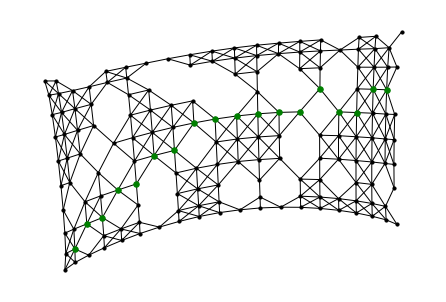

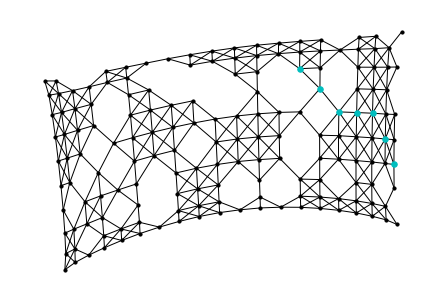

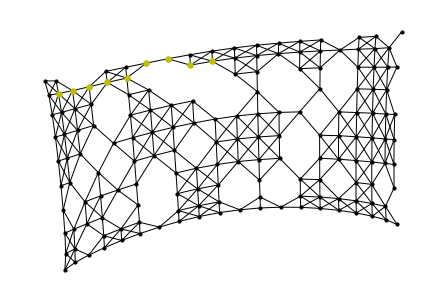

In [218]:
plot_paths(G, pos, all_paths)